# 0. Import Packages

In [162]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [229]:
# !pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [230]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. EDA

In [164]:
seed = 84
np.random.seed(seed)
original_df = pd.read_csv("CensusCanada2016Training.csv")
df = original_df.copy(deep=True)

In [165]:
df.head().T

,0,1,2,3,4
Total Population,4051.00,2329.00,5276.00,5967.00,4236.00
Total Households,1441.00,1026.00,2071.00,2203.00,1419.00
Median Household Income (Current Year $),68242.12,88172.37,103853.38,82796.63,91648.22
Total Households For Period Of Construction,1441.00,1026.00,2071.00,2203.00,1419.00
Total Households For Period Of Construction Built Before 1961,323.00,927.00,3.00,133.00,0.00
Total Households For Period Of Construction Built Between 1961 And 1980,199.00,70.00,607.00,1695.00,7.00
Total Households For Period Of Construction Built Between 1981 And 190,53.00,15.00,567.00,248.00,127.00
Total Households For Period Of Construction Built Between 1991 And 2000,182.00,3.00,651.00,79.00,938.00
Total Households For Period Of Construction Built Between 2001 And 2005,526.00,0.00,106.00,0.00,143.00
Total Households For Structure Type Houses,911.00,792.00,1418.00,1397.00,914.00


In [166]:
df.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'],
      dtype='object')

In [167]:
new_col_names = ['Population',
                'Households',
                'Median_income',
                'HH_construction',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']

In [168]:
df.columns = new_col_names
df.head()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
0,4051,1441,68242.12,1441,323,199,53,182,526,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,914,505,0,1348,1186,162


In [169]:
df.shape

(5000, 15)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         5000 non-null   int64  
 1   Households         5000 non-null   int64  
 2   Median_income      5000 non-null   float64
 3   HH_construction    5000 non-null   int64  
 4   HH_before_1961     5000 non-null   int64  
 5   HH_1961_1980       5000 non-null   int64  
 6   HH_1981_1990       5000 non-null   int64  
 7   HH_1991_2000       5000 non-null   int64  
 8   HH_2001_2005       5000 non-null   int64  
 9   HH_houses          5000 non-null   int64  
 10  HH_apt_LH_rise     5000 non-null   int64  
 11  HH_dwelling_other  5000 non-null   int64  
 12  HH_tenure          5000 non-null   int64  
 13  Dwellings_owner    5000 non-null   int64  
 14  Dwellings_renter   5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [171]:
df.describe()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4866.967400,1927.776200,77241.071536,1927.776200,386.510600,555.437800,260.48240,237.92820,138.595600,1134.79180,777.188400,15.796000,1810.954800,1182.21140,628.155800
std,2491.841571,974.811432,33371.567357,974.811432,416.908471,448.327845,257.86717,265.43332,221.809214,812.09222,891.021549,62.949187,897.938845,710.51703,594.295093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3289.750000,1333.750000,53040.835000,1333.750000,47.000000,192.000000,74.00000,58.00000,17.000000,534.00000,146.000000,0.000000,1258.000000,687.00000,201.000000
50%,4655.000000,1825.000000,76206.780000,1825.000000,238.000000,470.000000,181.00000,143.00000,52.000000,1076.00000,487.000000,2.000000,1724.500000,1112.00000,456.000000
75%,6233.750000,2428.250000,95438.495000,2428.250000,613.000000,830.000000,369.00000,325.00000,157.000000,1592.00000,1119.000000,6.000000,2281.250000,1570.00000,879.000000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.00000,2360.00000,2262.000000,9123.00000,15248.000000,1378.000000,11891.000000,8628.00000,6813.000000


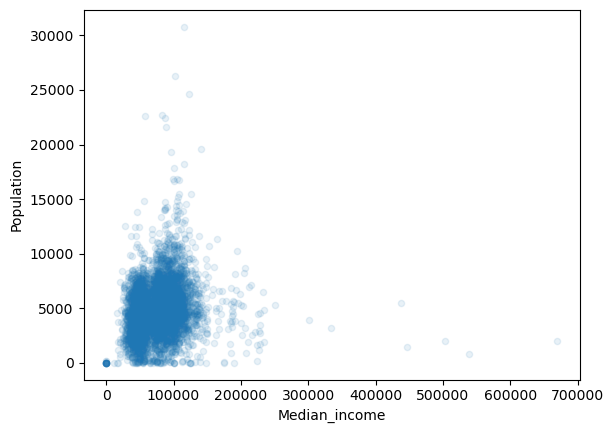

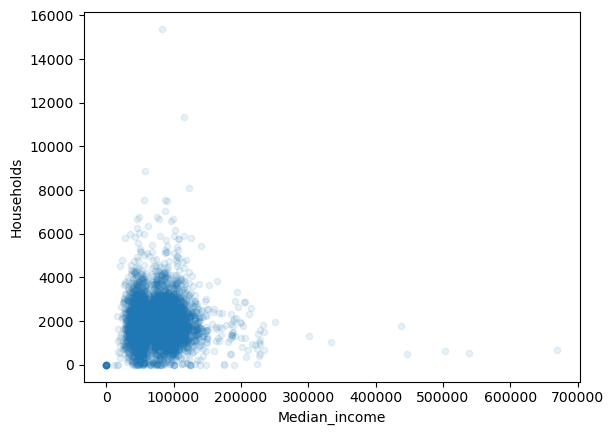

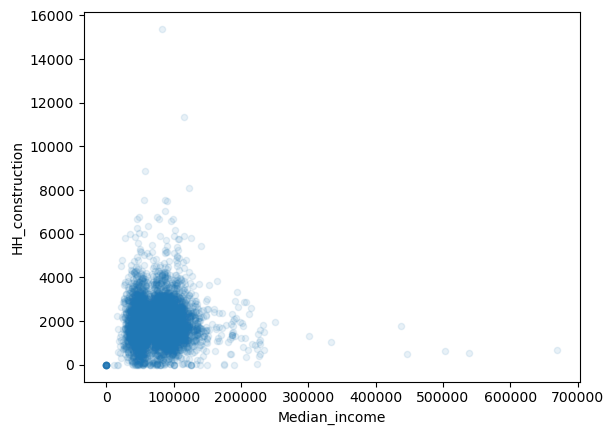

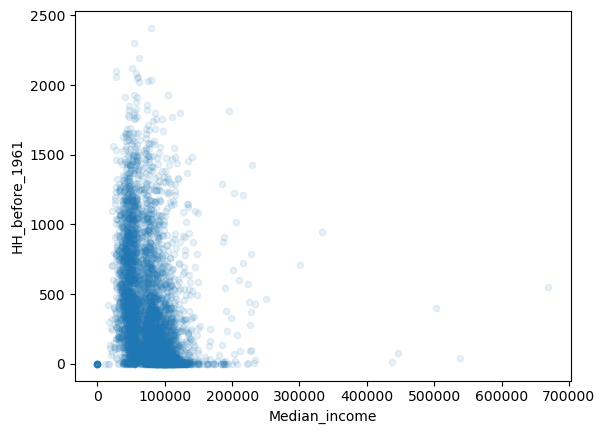

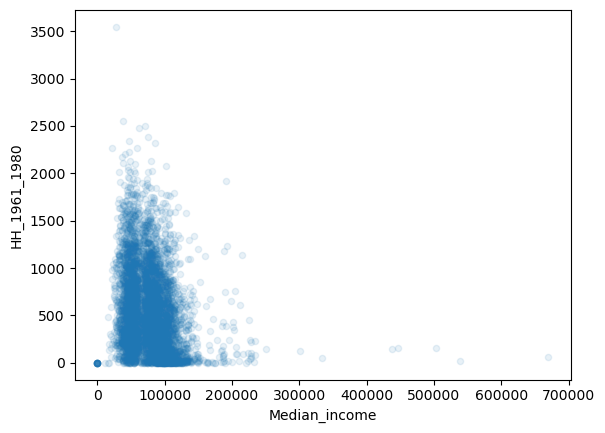

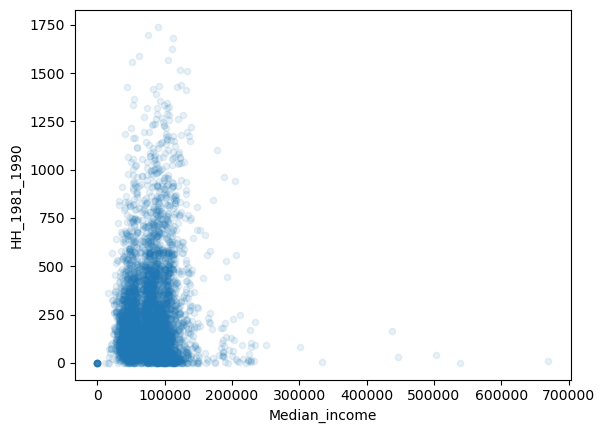

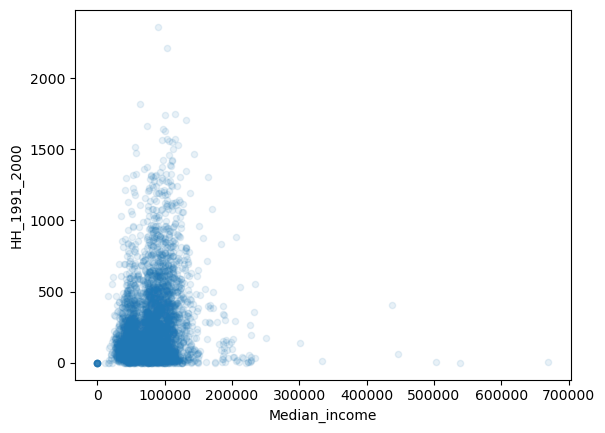

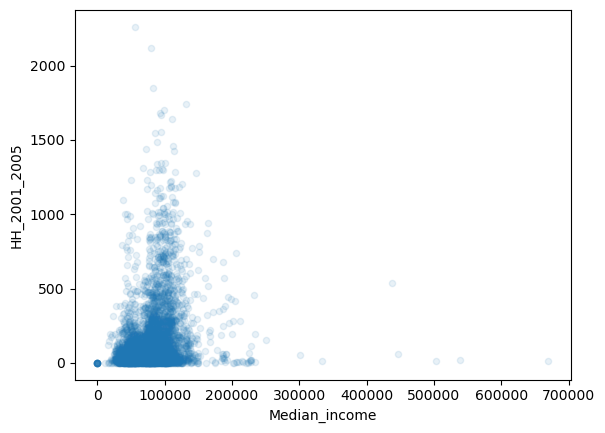

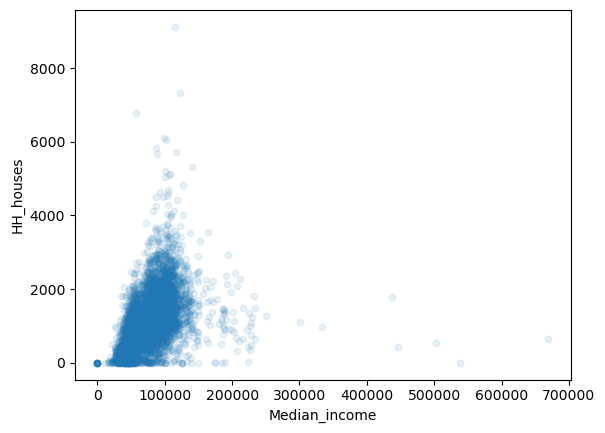

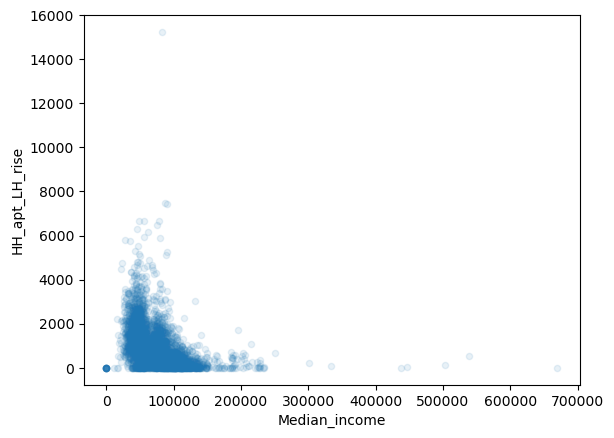

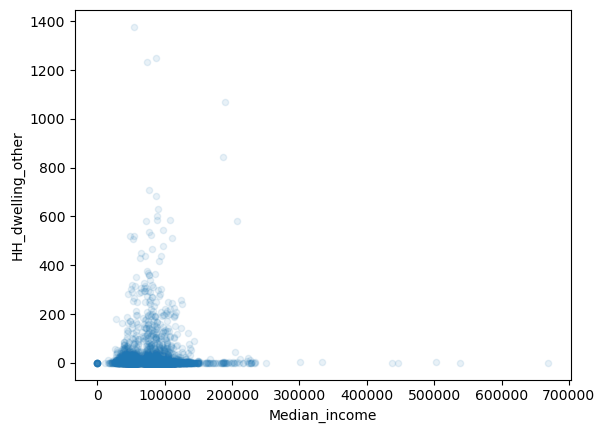

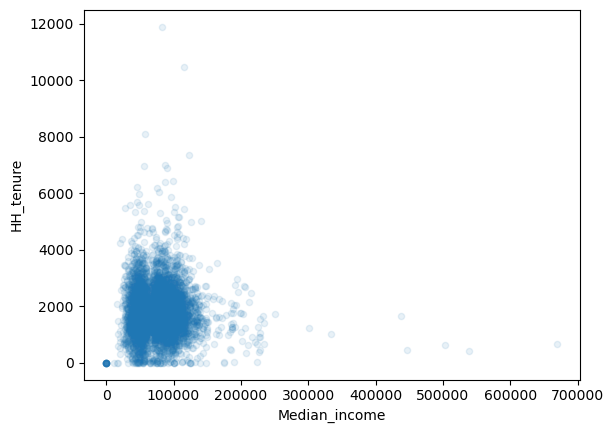

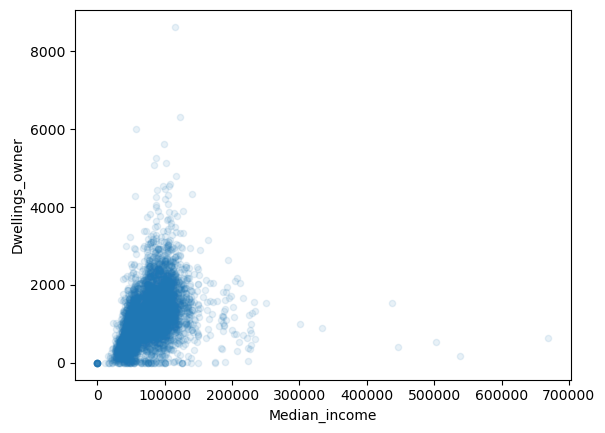

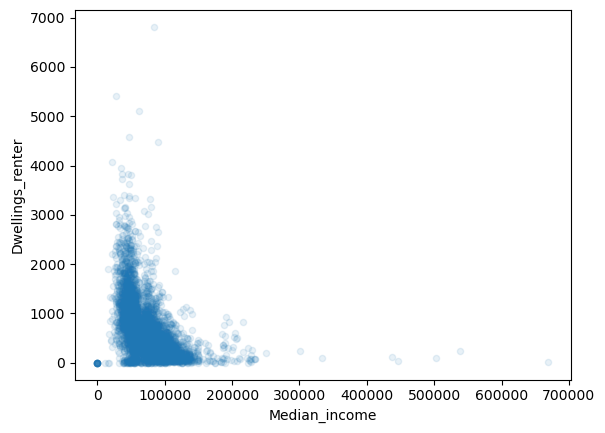

In [172]:
for column in df.columns:
    if column != 'Median_income':
        df.plot(kind = "scatter", x = 'Median_income', y = column, alpha=0.1)

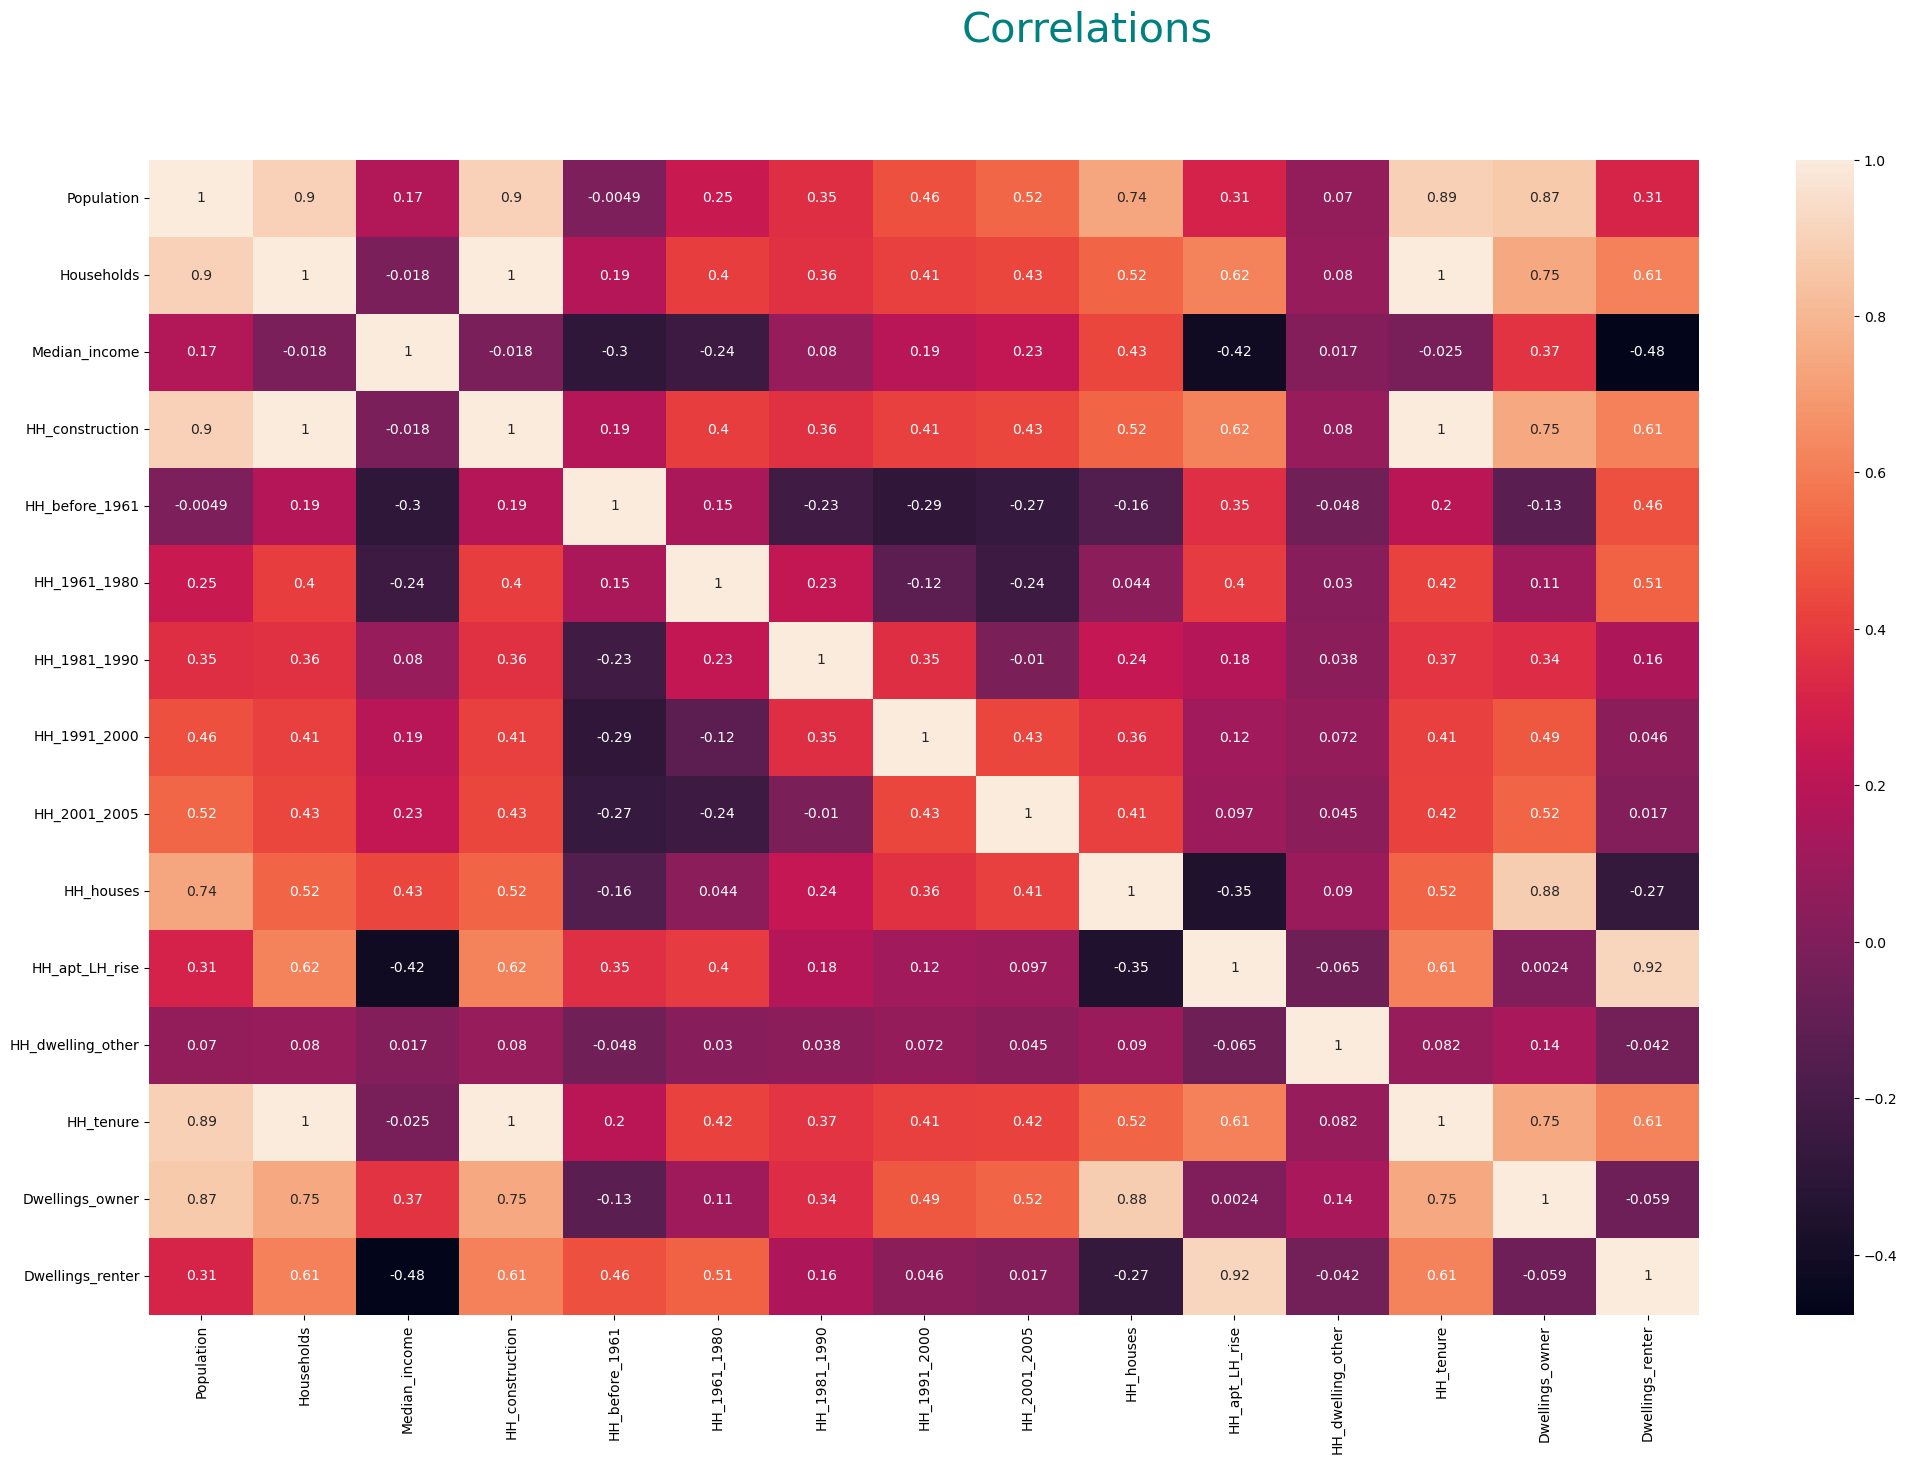

In [173]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:xlabel='Population', ylabel='Households'>

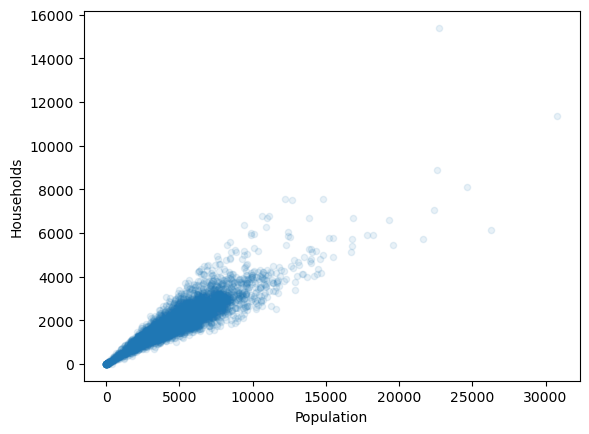

In [174]:
df.plot('Population', "Households", kind='scatter', alpha=0.1)

<AxesSubplot:>

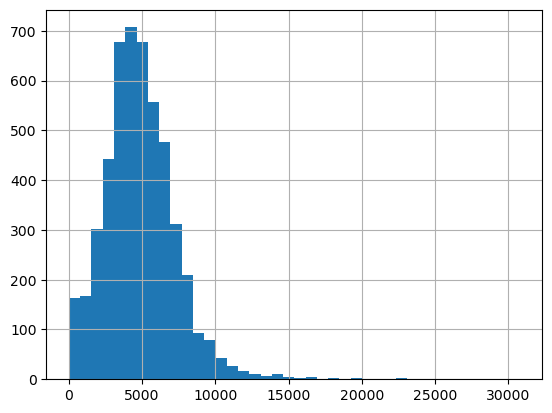

In [175]:
df['Population'].hist(bins=40)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Median_income'}>,
        <AxesSubplot:title={'center':'HH_before_1961'}>],
       [<AxesSubplot:title={'center':'HH_1961_1980'}>,
        <AxesSubplot:title={'center':'HH_1981_1990'}>,
        <AxesSubplot:title={'center':'HH_1991_2000'}>,
        <AxesSubplot:title={'center':'HH_2001_2005'}>],
       [<AxesSubplot:title={'center':'HH_houses'}>,
        <AxesSubplot:title={'center':'HH_apt_LH_rise'}>,
        <AxesSubplot:title={'center':'HH_dwelling_other'}>,
        <AxesSubplot:title={'center':'HH_tenure'}>],
       [<AxesSubplot:title={'center':'Dwellings_owner'}>,
        <AxesSubplot:title={'center':'Dwellings_renter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

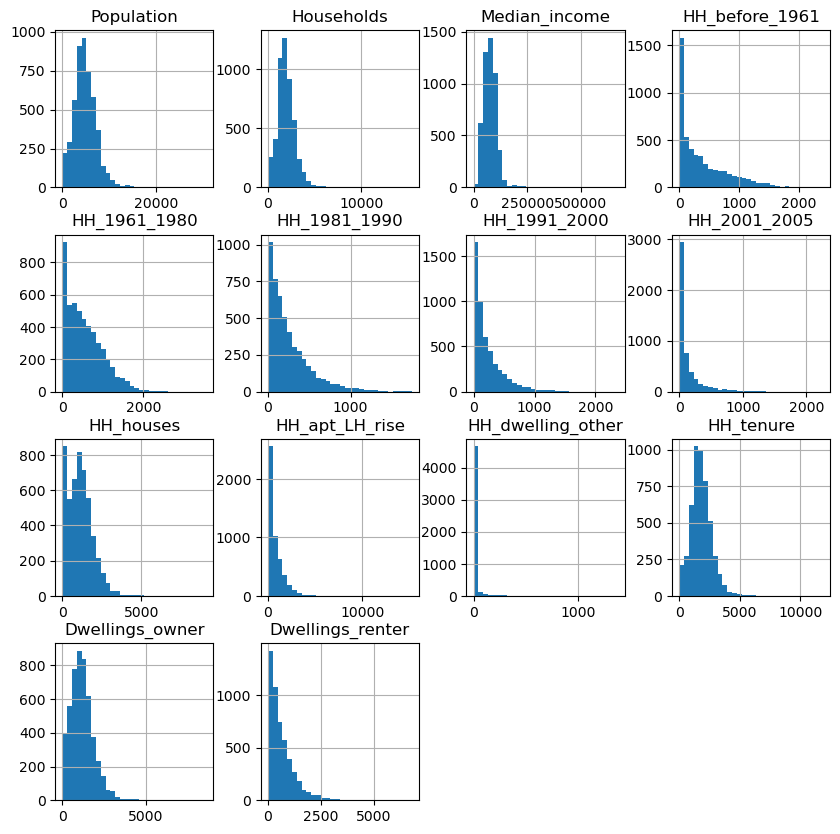

In [176]:
df[['Population',
                'Households',
                'Median_income',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']].hist(bins=30, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

In [177]:
df[df['Population']<500]

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
36,384,98,54750.00,98,3,29,17,23,9,73,0,25,101,75,11
62,41,22,54083.50,22,0,0,0,14,4,22,0,0,21,5,0
78,330,125,85909.09,125,3,33,25,27,11,110,10,5,119,119,0
98,3,2,100000.00,2,0,1,0,0,0,2,0,0,6,5,1
156,260,123,31356.32,123,83,12,0,11,16,24,99,0,125,38,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,172,48,75000.00,48,15,14,5,4,2,34,14,0,0,0,0
4800,2,1,47045.32,1,1,0,0,0,0,0,0,1,1,0,1
4922,20,8,80000.00,8,2,3,1,1,0,8,0,0,8,5,3
4962,341,95,119851.93,95,0,21,16,32,0,90,5,0,90,60,20


# 2. Feature Engineering

In [178]:
# average household size, drop construction, percentages for periods, percentage for types
# Total Households NOT for Tenure
# percentages for owner and renter

In [179]:
# drop rows with households equal 0. 
df.drop(df[df['Households']==0].index, inplace=True)

In [180]:
df['Avg_HH_size'] = df['Population']/df['Households']

df['Pctg_before_1961'] = df['HH_before_1961']/df['Households']
df['Pctg_1961_1980'] = df['HH_1961_1980']/df['Households']
df['Pctg_1981_1990'] = df['HH_1981_1990']/df['Households']
df['Pctg_1991_2000'] = df['HH_1991_2000']/df['Households']
df['Pctg_2001_2005'] = df['HH_2001_2005']/df['Households']

df['Pctg_house'] = df['HH_houses']/df['Households']
df['Pctg_apt_LH_rise'] = df['HH_apt_LH_rise']/df['Households']
df['Pctg_dwelling_other'] = df['HH_dwelling_other']/df['Households']

df['Pctg_not_tenure'] = 1-df['HH_tenure']/df['Households']
df['Pctg_owner'] = df['Dwellings_owner']/df['HH_tenure']
df['Pctg_renter'] = df['Dwellings_renter']/df['HH_tenure']

In [181]:
# clean nan in rows with HH_tenure.
df.loc[np.isnan(df['Pctg_owner']), ['Pctg_owner', 'Pctg_renter']] = 0

In [182]:
# drop HH_construction because it's the same as households
dropped_columns = ['HH_construction', 'Households', 'HH_before_1961', 'HH_1961_1980', 'HH_1981_1990',
                  'HH_1991_2000', 'HH_2001_2005', 'HH_houses', 'HH_apt_LH_rise', 'HH_dwelling_other',
                  'HH_tenure', 'Dwellings_owner', 'Dwellings_renter']
df.drop(columns=dropped_columns, inplace=True)

In [183]:
df.head()

,Population,Median_income,Avg_HH_size,Pctg_before_1961,Pctg_1961_1980,Pctg_1981_1990,Pctg_1991_2000,Pctg_2001_2005,Pctg_house,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_owner,Pctg_renter
0,4051,68242.12,2.811242,0.224150,0.138099,0.036780,0.126301,0.365024,0.632200,0.364330,0.003470,0.068008,0.684289,0.315711
1,2329,88172.37,2.269981,0.903509,0.068226,0.014620,0.002924,0.000000,0.771930,0.224172,0.003899,0.034113,0.785066,0.214934
2,5276,103853.38,2.547562,0.001449,0.293095,0.273781,0.314341,0.051183,0.684693,0.314824,0.000483,0.081120,0.799790,0.200210
3,5967,82796.63,2.708579,0.060372,0.769405,0.112574,0.035860,0.000000,0.634135,0.365865,0.000000,0.056287,0.611833,0.388167
4,4236,91648.22,2.985201,0.000000,0.004933,0.089500,0.661029,0.100775,0.644116,0.355884,0.000000,0.050035,0.879822,0.120178


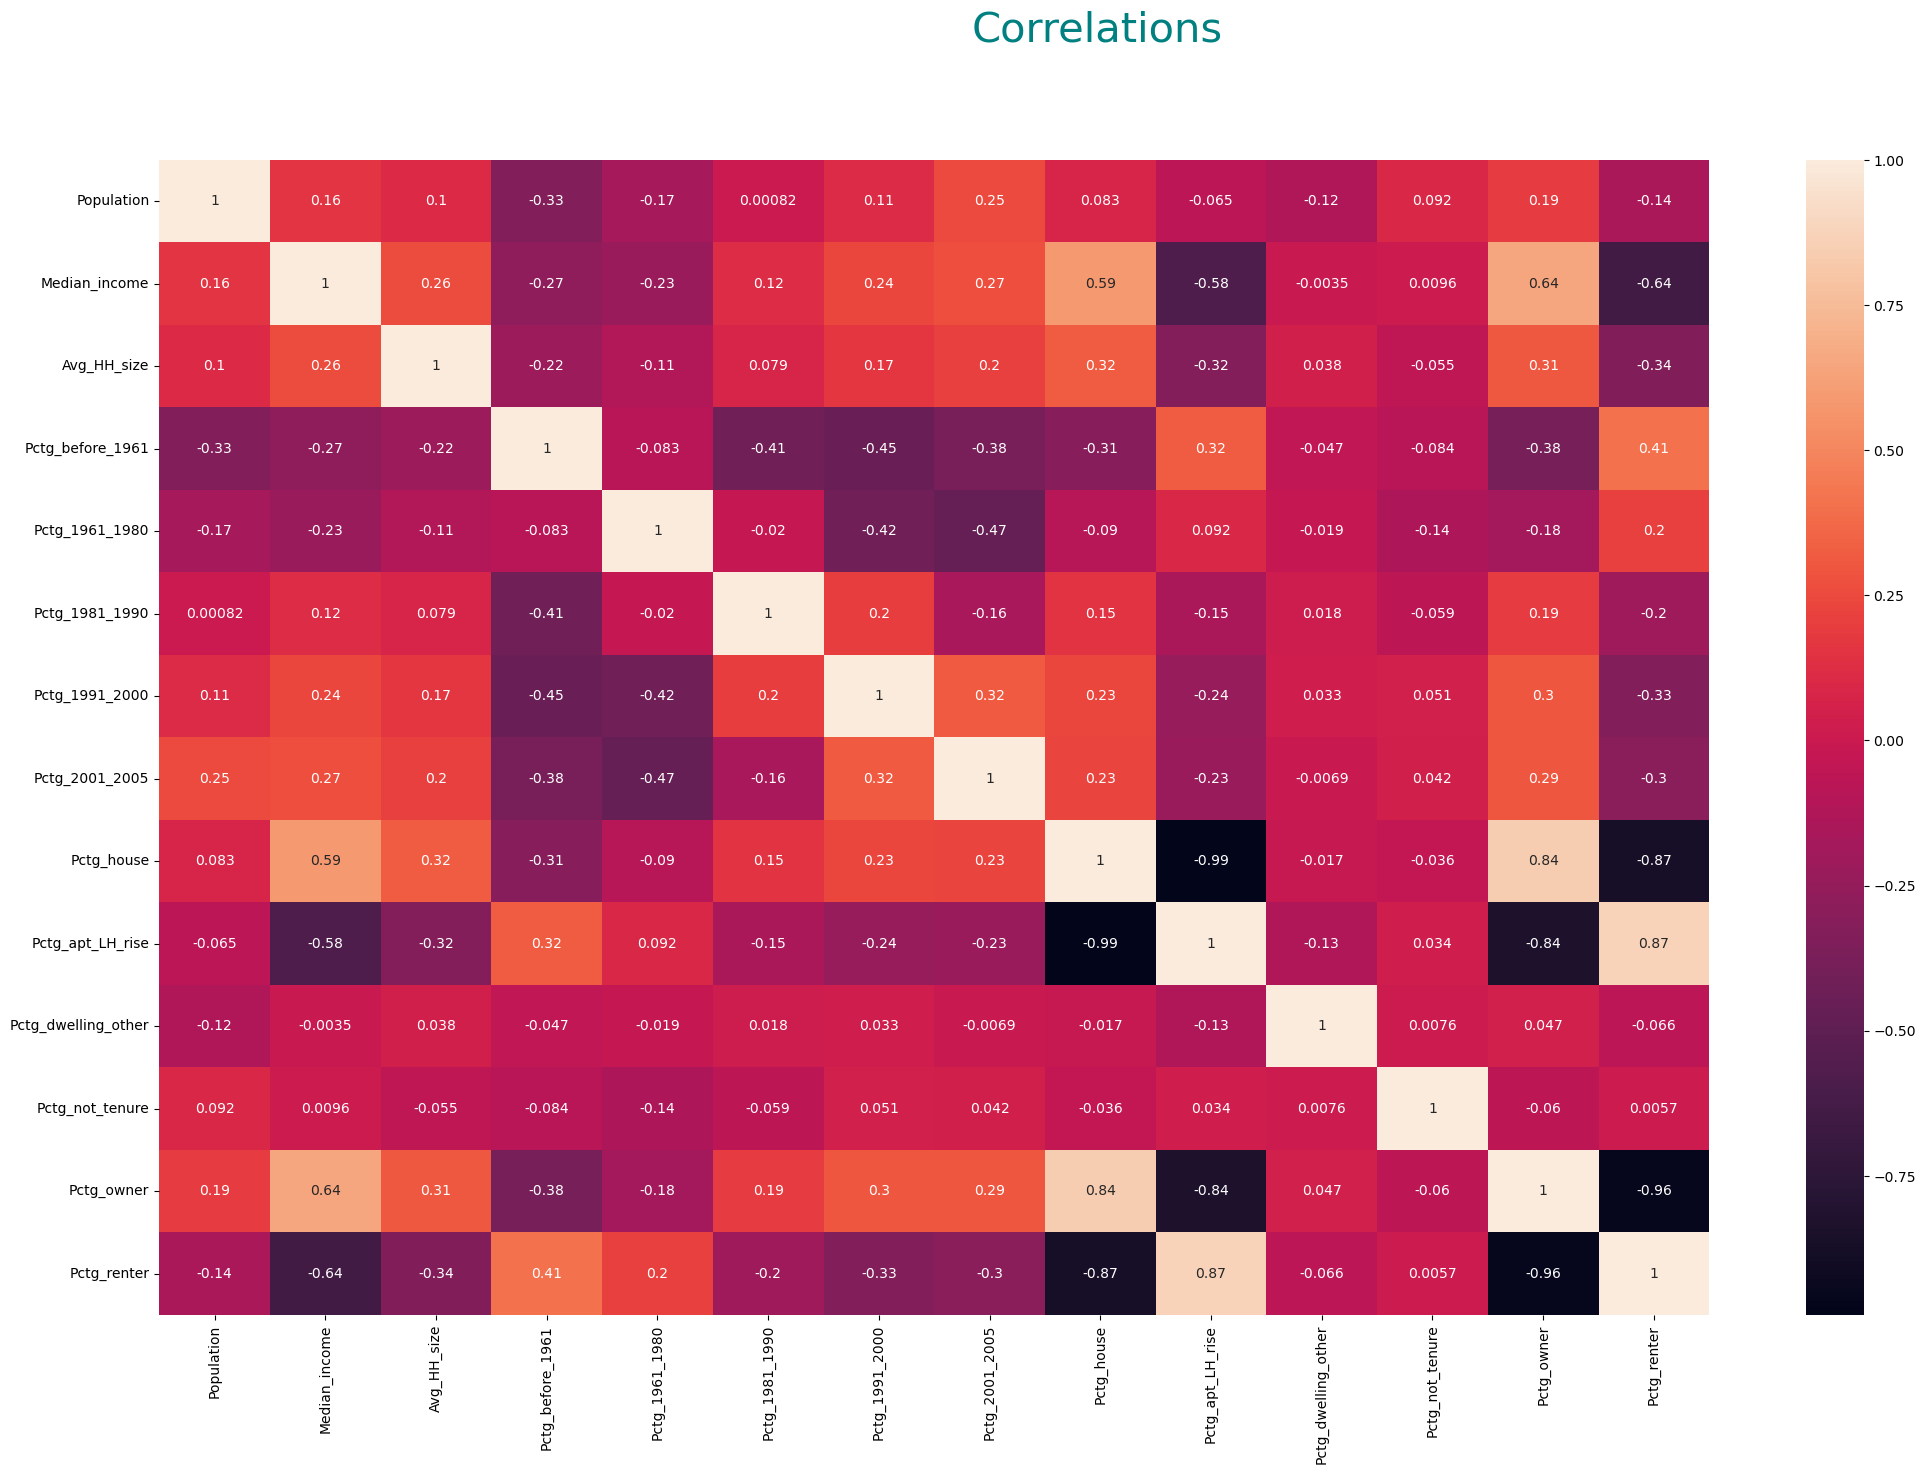

In [184]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [185]:
df.columns

Index(['Population', 'Median_income', 'Avg_HH_size', 'Pctg_before_1961',
       'Pctg_1961_1980', 'Pctg_1981_1990', 'Pctg_1991_2000', 'Pctg_2001_2005',
       'Pctg_house', 'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_owner', 'Pctg_renter'],
      dtype='object')

In [186]:
df_x = df[['Population', 'Avg_HH_size', 'Pctg_before_1961',
       'Pctg_1961_1980', 'Pctg_1981_1990', 'Pctg_1991_2000', 'Pctg_2001_2005',
       'Pctg_house', 'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_owner', 'Pctg_renter']].copy(deep=True)
df_y = df[['Median_income']].copy(deep=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           4980 non-null   int64  
 1   Median_income        4980 non-null   float64
 2   Avg_HH_size          4980 non-null   float64
 3   Pctg_before_1961     4980 non-null   float64
 4   Pctg_1961_1980       4980 non-null   float64
 5   Pctg_1981_1990       4980 non-null   float64
 6   Pctg_1991_2000       4980 non-null   float64
 7   Pctg_2001_2005       4980 non-null   float64
 8   Pctg_house           4980 non-null   float64
 9   Pctg_apt_LH_rise     4980 non-null   float64
 10  Pctg_dwelling_other  4980 non-null   float64
 11  Pctg_not_tenure      4980 non-null   float64
 12  Pctg_owner           4980 non-null   float64
 13  Pctg_renter          4980 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 583.6 KB


# 3. Clustering

In [215]:
# Scaling
kmeans_scaler = StandardScaler()
kmeans_scaler.fit(df)
scaled_df = kmeans_scaler.transform(df)

In [216]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns
scaled_df.head()

,Population,Median_income,Avg_HH_size,Pctg_before_1961,Pctg_1961_1980,Pctg_1981_1990,Pctg_1991_2000,Pctg_2001_2005,Pctg_house,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_owner,Pctg_renter
0,-0.337217,-0.281469,0.254957,0.008456,-0.780409,-0.785956,0.023853,3.072074,0.047350,-0.023648,-0.160355,0.128240,0.099729,-0.074389
1,-1.032272,0.321136,-0.334440,2.990618,-1.123810,-0.957966,-0.941323,-0.683360,0.494657,-0.468657,-0.150991,-0.283768,0.523244,-0.502714
2,0.157233,0.795263,-0.032173,-0.969129,-0.018650,1.053670,1.494881,-0.156780,0.215394,-0.180833,-0.225583,0.287619,0.585123,-0.565295
3,0.436143,0.158597,0.143164,-0.710474,2.322265,-0.197637,-0.683664,-0.683360,0.053546,-0.018777,-0.236128,-0.014238,-0.204769,0.233567
4,-0.262545,0.426231,0.444386,-0.975488,-1.434876,-0.376740,4.207010,0.353433,0.085495,-0.050464,-0.236128,-0.090229,0.921458,-0.905451


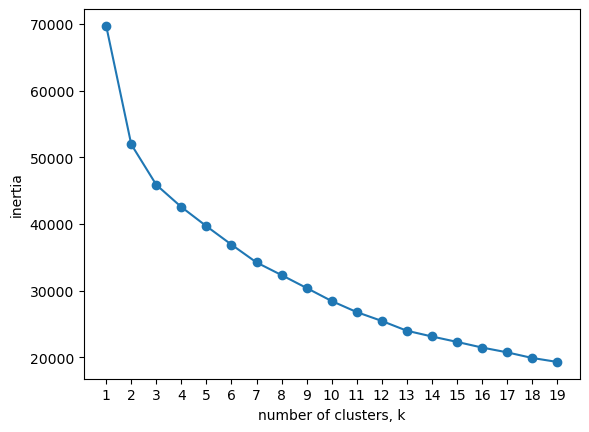

In [220]:
ks = range(1,20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


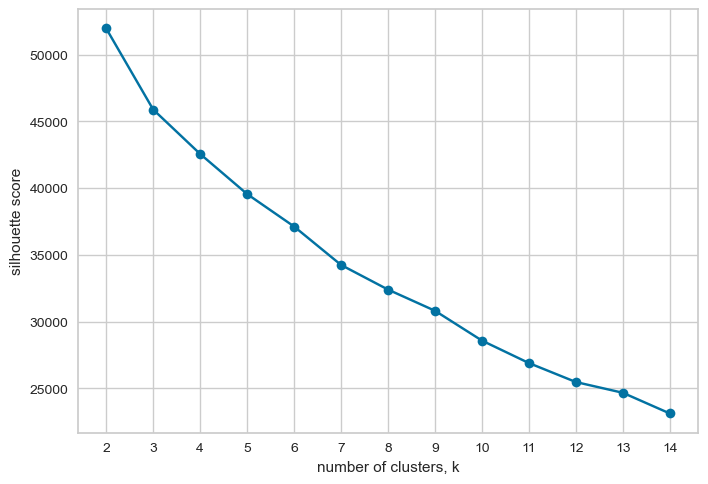

In [241]:
ks = range(2,15)
silhouette_score_list = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit_predict(scaled_df)
    
    # Append the inertia to the list of inertias
    s_score = silhouette_score(scaled_df, model.labels_, metric='euclidean')
    silhouette_score_list.append(model.inertia_)
    
    
# Plot ks vs inertias
plt.plot(ks, silhouette_score_list, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

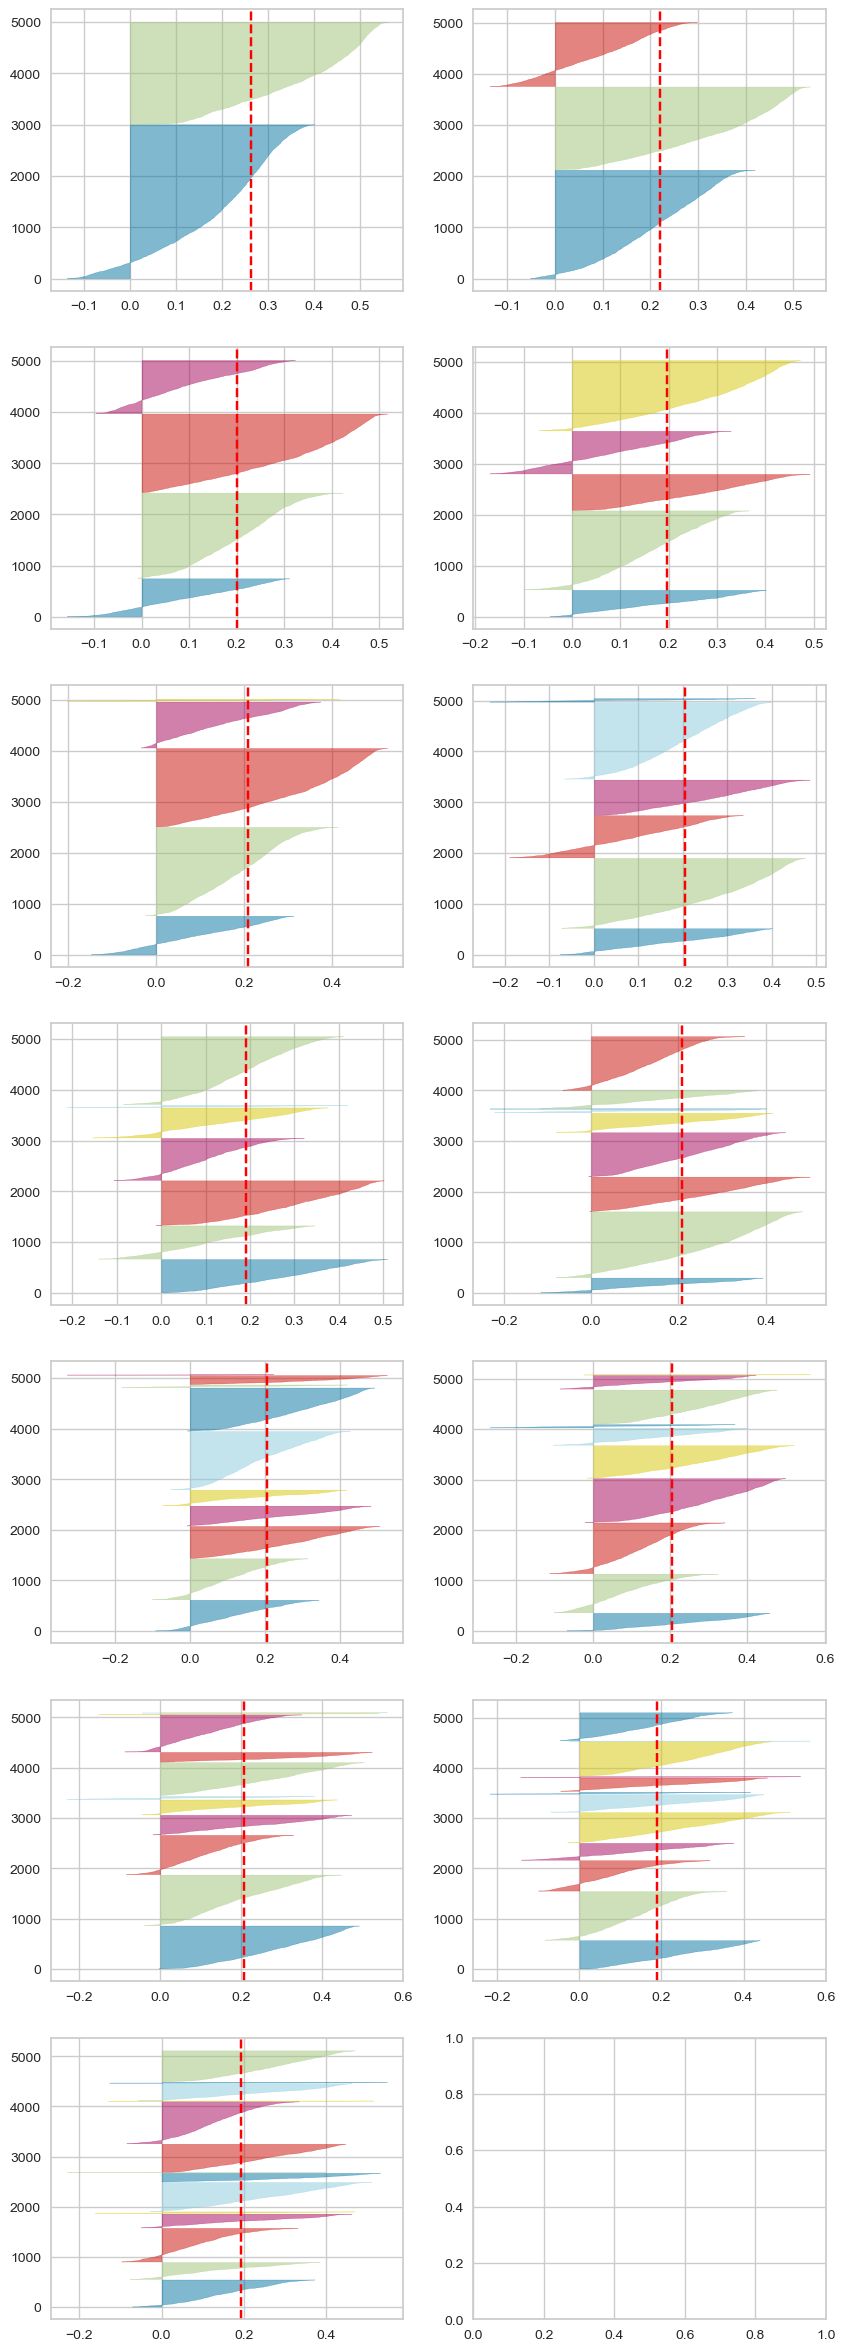

In [240]:

fig, ax = plt.subplots(7, 2, figsize=(10,30))
for k in range(2,15):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df) 